[ 2761.  4535.  5995.  7736.  9720. 11821. 14411. 17238. 20471. 24363.
 28060. 31211. 34598. 37251. 40235. 42708. 44730. 59882. 63932. 66576.
 68584. 70635. 72528. 74279. 75101. 75993. 76392. 77041. 77262. 77779.
 78190. 78630. 78959. 79389. 79968. 80174. 80302. 80422. 80565. 80710.
 80813. 80859. 80904. 80924. 80955. 80980. 81003. 81021. 81048. 81077.
 81116. 81151. 81235. 81300. 81416. 81498. 81600.]
57
tensor([[0.8092],
        [0.8095],
        [0.8098],
        [0.8100],
        [0.8102],
        [0.8105],
        [0.8108],
        [0.8112],
        [0.8115],
        [0.8123],
        [0.8130],
        [0.8142],
        [0.8150]])
epoch:0, train_loss:0.3251844644546509, test_loss:0.4854491949081421
epoch:20, train_loss:0.05239176005125046, test_loss:0.0019703260622918606
epoch:40, train_loss:0.016881251707673073, test_loss:0.0008797249756753445
epoch:60, train_loss:0.002451427048072219, test_loss:0.002791975624859333
epoch:80, train_loss:0.0018952501704916358, test_loss:0.00025370

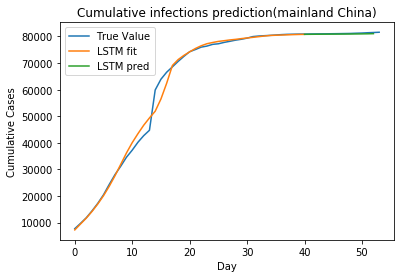

In [9]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# 数据预处理
import pandas as pd
df = pd.read_excel('real_data.xlsx')
value = df['全国累计确诊'].values[10:67]
print(value)
print(len(value))
x = []
y = []
seq = 3
for i in range(len(value)-seq-1):
    x.append(value[i:i+seq])
    y.append(value[i+seq])
#print(x, '\n', y)

train_x = (torch.tensor(x[0:40]).float()/100000.).reshape(-1, seq, 1)
train_y = (torch.tensor(y[0:40]).float()/100000.).reshape(-1, 1)
test_x = (torch.tensor(x[40:57]).float()/100000.).reshape(-1, seq, 1)
test_y = (torch.tensor(y[40:57]).float()/100000.).reshape(-1, 1)
print(test_y)
# 模型训练
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=16, num_layers=1, batch_first=True)
        self.linear = nn.Linear(16 * seq, 1)
    def forward(self, x):
        x, (h, c) = self.lstm(x)
        x = x.reshape(-1, 16 * seq)
        x = self.linear(x)
        return x

# 模型训练
model = LSTM()
optimzer = torch.optim.Adam(model.parameters(), lr=0.005)
loss_func = nn.MSELoss()
model.train()

for epoch in range(400):
    output = model(train_x)
    loss = loss_func(output, train_y)
    optimzer.zero_grad()
    loss.backward()
    optimzer.step()
    if epoch % 20 == 0:
        tess_loss = loss_func(model(test_x), test_y)
        print("epoch:{}, train_loss:{}, test_loss:{}".format(epoch, loss, tess_loss))

# 模型预测、画图
model.eval()
prediction = list((model(train_x).data.reshape(-1))*100000) + list((model(test_x).data.reshape(-1))*100000)
plt.plot(value[3:], label='True Value')
plt.plot(prediction[:41], label='LSTM fit')
plt.plot(np.arange(40, 53, 1), prediction[40:], label='LSTM pred')
print(len(value[3:]))
print(len(prediction[40:]))
plt.legend(loc='best')
plt.title('Cumulative infections prediction(mainland China)')
plt.xlabel('Day')
plt.ylabel('Cumulative Cases')
plt.show()

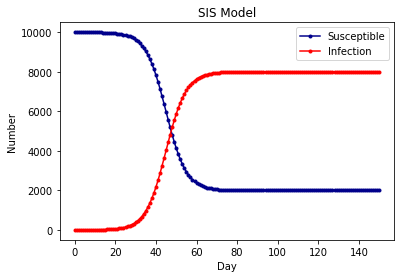

In [5]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

# N为人群总数
N = 10000
# β为传染率系数
beta = 0.25
# gamma为恢复率系数
gamma = 0.05
# I_0为感染者的初始人数
I_0 = 1
# S_0为易感者的初始人数
S_0 = N - I_0
# T为传播时间
T = 150

# INI为初始状态下的数组
INI = (S_0,I_0)


def funcSIS(inivalue,_):
    Y = np.zeros(2)
    X = inivalue
 # 易感个体变化
    Y[0] = - (beta * X[0]) / N * X[1] + gamma * X[1]
 # 感染个体变化
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]
    return Y

T_range = np.arange(0,T + 1)

RES = spi.odeint(funcSIS,INI,T_range)


plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.title('SIS Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

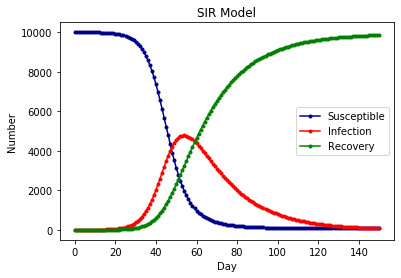

In [6]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

# N为人群总数
N = 10000
# β为传染率系数
beta = 0.25
# gamma为恢复率系数
gamma = 0.05
# I_0为感染者的初始人数
I_0 = 1
# R_0为治愈者的初始人数
R_0 = 0
# S_0为易感者的初始人数
S_0 = N - I_0 - R_0
# T为传播时间
T = 150

# INI为初始状态下的数组
INI = (S_0,I_0,R_0)


def funcSIR(inivalue,_):
    Y = np.zeros(3)
    X = inivalue
 # 易感个体变化
    Y[0] = - (beta * X[0] * X[1]) / N
 # 感染个体变化
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]
 # 治愈个体变化
    Y[2] = gamma * X[1]
    return Y

T_range = np.arange(0,T + 1)

RES = spi.odeint(funcSIR,INI,T_range)


plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,2],color = 'green',label = 'Recovery',marker = '.')
plt.title('SIR Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

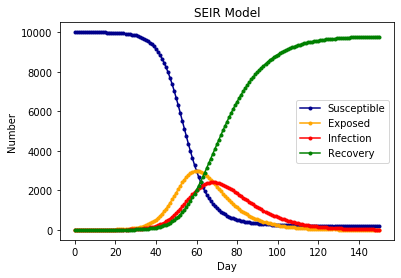

In [7]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

# N为人群总数
N = 10000
# β为传染率系数
beta = 0.2
# gamma为恢复率系数
gamma = 0.1
# Te为疾病潜伏期
Te = 10
# I_0为感染者的初始人数
I_0 = 1
# E_0为潜伏者的初始人数
E_0 = 0
# R_0为治愈者的初始人数
R_0 = 0
# S_0为易感者的初始人数
S_0 = N - I_0 - E_0 - R_0
# T为传播时间
T = 150

# INI为初始状态下的数组
INI = (S_0,E_0,I_0,R_0)

def funcSEIR(inivalue,_):
    Y = np.zeros(4)
    X = inivalue
 # 易感个体变化
    Y[0] = - (beta * X[0] *( X[2]+X[1])) / N
 # 潜伏个体变化
    Y[1] = (beta * X[0] *( X[2]+X[1])) / N - X[1] / Te
 # 感染个体变化
    Y[2] = X[1] / Te - gamma * X[2]
 # 治愈个体变化
    Y[3] = gamma * X[2]
    return Y

T_range = np.arange(0,T + 1)

RES = spi.odeint(funcSEIR,INI,T_range)

plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(RES[:,2],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,3],color = 'green',label = 'Recovery',marker = '.')

plt.title('SEIR Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

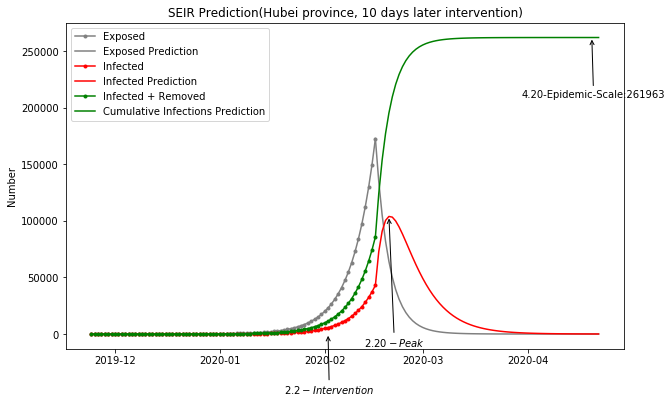

In [2]:
# SEIR传染病模型仿真
# N: 区域内总人口                      #
# S: 易感者                           #
# E: 潜伏者                           #
# I: 感染者                           #
# R: 康复者                           #
# r: 每天接触的人数                    #
# r2: 潜伏者每天接触的人数              #
# beta1: 感染者传染给易感者的概率, I——>S #
# beta2: 潜伏者感染易感者的概率, E——>S   #
# sigma: 潜伏者转化为感染者的概率, E——>I #
# gama: 康复概率, I——>R                #
# T: 传播时间                          #



import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

# 阶段一，11.24 - 1.23  1.11
N = 60000000         # 湖北省为6000万，武汉900万
E_0 = 0
I_0 = 1
R_0 = 0
S_0 = N - E_0 - I_0 - R_0
b1 = 0.02         # 真实数据拟合得出
b2 = 0.021/3#0.007
# r2 * beta2 = 2
sigma = 1/14         # 1/14, 潜伏期的倒数
gamma = 1/7          # 1/7, 感染期的倒数
r = 18                # 政府干预措施决定
T = 84

#ode求解
INI = [S_0, E_0, I_0, R_0]
def SEIR(inivalue, _):
    X = inivalue
    Y = np.zeros(4)
    # S数量
    Y[0] = - (r * b1 * X[0] * X[2]) / N - (r * b2 * X[0] * X[1]) / N
    # E数量
    Y[1] = (r * b1 * X[0] * X[2]) / N + (r * b2 * X[0] * X[1]) / N - sigma * X[1]
    # I数量
    Y[2] = sigma * X[1] - gamma * X[2]
    # R数量
    Y[3] = gamma * X[2]
    return Y

T_range = np.arange(0, T+1)
Res = spi.odeint(SEIR, INI, T_range)
S_t = Res[:, 0]
E_t = Res[:, 1]
I_t = Res[:, 2]
R_t = Res[:, 3]
#print(I_t[60], type(I_t)) # 549 <class 'numpy.ndarray'>
#print(E_t[57])


# 阶段二，1.23后
S_2 = S_t[T]
E_2 = E_t[T]
I_2 = I_t[T]
R_2 = R_t[T]

beta1 = 0.02#0.15747     # 真实数据拟合得出
beta2 = 0.021/3#0.78735
# r2 * beta2 = 2
sigma2 = 1/4   # 1/14, 潜伏期的倒数
#gamma = 1/6.736     # 1/7, 感染期的倒数
r2 = 0.1              # 政府干预措施决定
T2 = 150-T

#ode求解
INI = [S_2, E_2, I_2, R_2]
def SEIR(inivalue, _):
    X = inivalue
    Y = np.zeros(4)
    # S数量
    Y[0] = - (r2 * beta1 * X[0] * X[2]) / N - (r2 * beta2 * X[0] * X[1]) / N
    # E数量
    Y[1] = (r2 * beta1 * X[0] * X[2]) / N + (r2 * beta2 * X[0] * X[1]) / N - sigma2 * X[1]
    # I数量
    Y[2] = sigma2 * X[1] - gamma * X[2]
    # R数量
    Y[3] = gamma * X[2]
    return Y

T_range = np.arange(0, T2+1)
Res = spi.odeint(SEIR, INI, T_range)
S_t2 = Res[:, 0]
E_t2 = Res[:, 1]
I_t2 = Res[:, 2]
R_t2 = Res[:, 3]

plt.figure(figsize=(10, 6))
#显示日期
import pandas as pd
xs = pd.date_range(start='20191124', periods=T+1, freq='1D')#生成2020-02-11类型的日期数组（）

xs2 = pd.date_range(start='20200216', periods=T2+1, freq='1D')


plt.plot(xs, E_t, color='grey', label='Exposed', marker='.')
plt.plot(xs2, E_t2, color='grey', label='Exposed Prediction')
plt.plot(xs, I_t, color='red', label='Infected', marker='.')
plt.plot(xs2, I_t2, color='red', label='Infected Prediction')
plt.plot(xs, I_t + R_t, color='green', label='Infected + Removed', marker='.')
plt.plot(xs2, I_t2 + R_t2, color='green', label='Cumulative Infections Prediction')

plt.ylabel('Number')
plt.title('SEIR Prediction(Hubei province, 10 days later intervention)')
plt.legend()

xs3 = pd.date_range(start='20200202', periods=1, freq='1D')

plt.annotate(r'$2.2-Intervention$', xy=(xs3, 200), xycoords='data', xytext=(-44, -60), textcoords='offset points',
             fontsize=10, arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0'))

xs4 = pd.date_range(start='20200220', periods=1, freq='1D')
plt.annotate(r'$2.20-Peak$', xy=(xs4, 103911), xycoords='data', xytext=(-25, -130), textcoords='offset points',
             fontsize=10, arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0'))

xs5 = pd.date_range(start='20200420', periods=1, freq='1D')
plt.annotate(r'4.20-Epidemic-Scale:261963', xy=(xs5, 261963), xycoords='data', xytext=(-70, -60), textcoords='offset points',
             fontsize=10, arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0'))
plt.show()

In [3]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# 数据预处理
import pandas as pd
df = pd.read_excel('real_data.xlsx')    # 这个会直接默认读取到这个Excel的第一个表单
value = df['湖北现有确诊'].values[0:67]
#value = df['全国累计确诊'].values[10:50]
print(len(value))
x = []
y = []
seq = 3
for i in range(len(value)-seq):
    x.append(value[i:i+seq])
    y.append(value[i+seq])
#print(x, '\n', y)
print(len(x))   # 67

train_x = (torch.tensor(x[:50]).float()/100000.).reshape(-1, seq, 1)
train_y = (torch.tensor(y[:50]).float()/100000.).reshape(-1, 1)
test_x = (torch.tensor(x[50:]).float()/100000.).reshape(-1, seq, 1)
test_y = (torch.tensor(y[50:]).float()/100000.).reshape(-1, 1)
print(len(train_x))
print(len(test_x))

# 模型训练
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=16, num_layers=1, batch_first=True)
        self.linear = nn.Linear(16 * seq, 1)
    def forward(self, x):
        x, (h, c) = self.lstm(x)
        x = x.reshape(-1, 16 * seq)
        x = self.linear(x)
        return x

# 模型训练
model = LSTM()
optimzer = torch.optim.Adam(model.parameters(), lr=0.005)
loss_func = nn.MSELoss()
model.train()

for epoch in range(400):
    output = model(train_x)
    loss = loss_func(output, train_y)
    optimzer.zero_grad()
    loss.backward()
    optimzer.step()
    if epoch % 20 == 0:
        tess_loss = loss_func(model(test_x), test_y)
        print("epoch:{}, train_loss:{}, test_loss:{}".format(epoch, loss, tess_loss))

# 模型预测、画图
model.eval()
prediction = list((model(train_x).data.reshape(-1))*100000) + list((model(test_x).data.reshape(-1))*100000)
plt.plot(value[3:], label='True Value')
plt.plot(prediction[:51], label='LSTM fit')
plt.plot(np.arange(50, 64, 1), prediction[50:64], label='LSTM pred')
print(len(value[3:]))
print(len(prediction))
plt.legend(loc='best')
plt.title('Active infections prediction(Hubei province)')
plt.xlabel('Day')
plt.ylabel('Active Cases')
plt.show()

ModuleNotFoundError: No module named 'torch'

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
'''
# 数据预处理
with open("data.txt", "r", encoding="utf-8") as f:
    data = f.read()
print([data])
data = [row.split(',') for row in data.split("\n")]
value = [int(each[1]) for each in data]
print(data, '\n', value)
# 异常点处理
'''
import pandas as pd
df = pd.read_excel('real_data.xlsx')#这个会直接默认读取到这个Excel的第一个表单
value = df['湖北新增确诊'].values[0:67]
#value = df['全国累计确诊'].values[10:50]
print(len(value))


x = []
y = []
seq = 3
for i in range(len(value)-seq-1):
    x.append(value[i:i+seq])
    y.append(value[i+seq])
#print(x, '\n', y)

train_x = (torch.tensor(x[:50]).float()/1000.).reshape(-1, seq, 1)
train_y = (torch.tensor(y[:50]).float()/1000.).reshape(-1, 1)
test_x = (torch.tensor(x[50:]).float()/1000.).reshape(-1, seq, 1)
test_y = (torch.tensor(y[50:]).float()/1000.).reshape(-1, 1)
#print(train_x, '\n', train_y)
# 模型训练
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=16, num_layers=1, batch_first=True)
        self.linear = nn.Linear(16 * seq, 1)
    def forward(self, x):
        x, (h, c) = self.lstm(x)
        x = x.reshape(-1, 16 * seq)
        x = self.linear(x)
        return x

# 模型训练
model = LSTM()
optimzer = torch.optim.Adam(model.parameters(), lr=0.005)
loss_func = nn.MSELoss()
model.train()
l = []
for epoch in range(600):
    output = model(train_x)
    loss = loss_func(output, train_y)
    l.append(loss)
    optimzer.zero_grad()
    loss.backward()
    optimzer.step()
    if epoch % 20 == 0:
        tess_loss = loss_func(model(test_x), test_y)
        print("epoch:{}, train_loss:{}, test_loss:{}".format(epoch, loss, tess_loss))

# 模型预测、画图
model.eval()
prediction = list((model(train_x).data.reshape(-1))*1000) + list((model(test_x).data.reshape(-1))*1000)
print(len(value[3:]), len(prediction), len(np.arange(50, 64, 1)), len(prediction[50:64]))
#print('train_x', train_x*1000, '\n', 'train_y', train_y*1000, '\n', 'test_x', test_x*1000, '\n', 'test_y', len(test_y), test_y*1000)
plt.figure(1)
plt.plot(value[3:], label='True Value')
plt.plot(prediction[:51], label='LSTM fit')
plt.plot(np.arange(50, 63, 1), prediction[50:64], label='LSTM pred')
plt.legend(loc='best')
plt.title('New daily infections prediction(Hubei province)')
plt.xlabel('Day')
plt.ylabel('New Confirmed Cases')
#plt.figure(2)
#plt.plot(l)
plt.show()